In [124]:
# Add the shared code directory to the module search path
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'shared_code')))

from pauli_channel_approximation import PCA

In [125]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [364]:
import dill
data = {'sparsity':{}, 'agi':{}}
sample_values = [0,'1e-15','1e-10', '1e-07', '1e-06', '5e-07', '1e-05', '0.001']
sample_values = [0, '0.001','0.0001', '0.005', '0.0005', '0.00025', '0.000125', '6.25e-05', '9.375e-05', '7.8125e-05']
sample_values = [0,'6.25e-05', '0.0001', '0.00025', '0.0005']
for ind, eta in enumerate(sample_values):
    with open(f'sparsity{eta}.pkl', 'rb') as f:
        data['sparsity'][eta] = dill.load(f)
    with open(f'agi{ind}.pkl', 'rb') as f:
        data['agi'][eta] = dill.load(f)

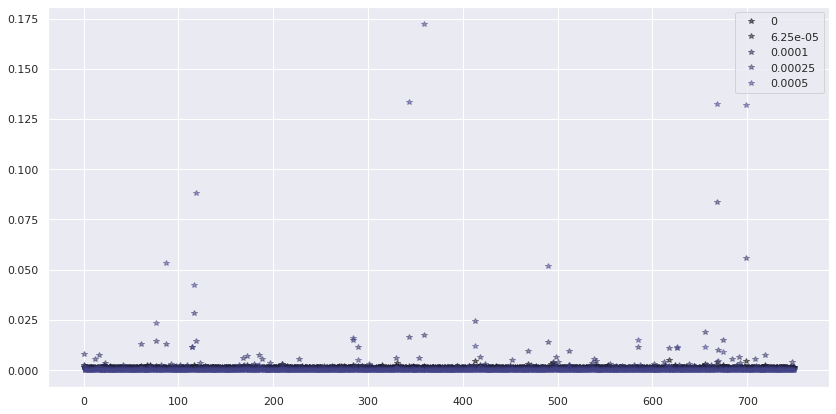

In [365]:
plt.figure(figsize=(14,7))
for ind,eta in enumerate(sample_values):
    plt.plot(np.arange(750), data['agi'][eta]['weights'][1].T.tolist()[0], 
             '*', color=f'#{ind}{ind}{ind}{ind}{2*ind}{2*ind}', alpha=.5, label=eta)
plt.legend()

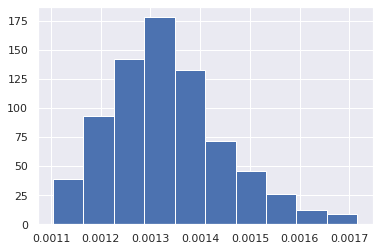

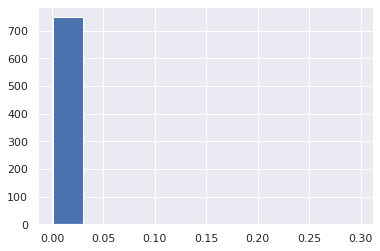

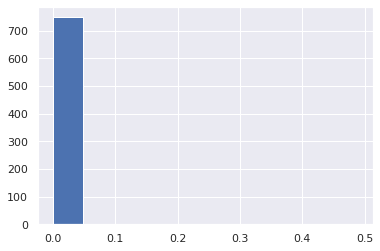

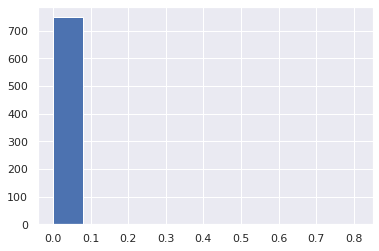

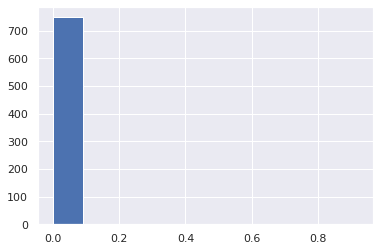

In [366]:
for ind,eta in enumerate(sample_values):
    plt.hist(data['sparsity'][eta]['weights'][1].T.tolist()[0])
    plt.show()

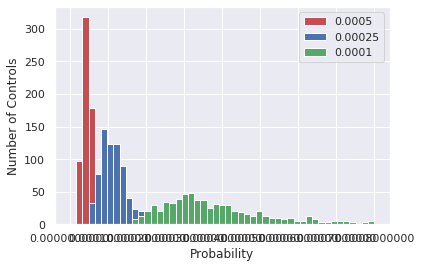

In [367]:
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
fig, ax = plt.subplots()
colors = ['r','b','g','y','k','m','c', 'r']
for ind,eta in enumerate(sample_values[:1:-1]):
    ax.hist(data['sparsity'][eta]['weights'][1].T.tolist()[0], color=colors[ind], label=eta,
           bins=np.linspace(0,.0008,50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.10f'))
plt.legend()
plt.ylabel("Number of Controls")
plt.xlabel('Probability')
plt.savefig("sparisity-versus-parameter.png")
plt.show()

In [368]:
sample_values

[0, '6.25e-05', '0.0001', '0.00025', '0.0005']

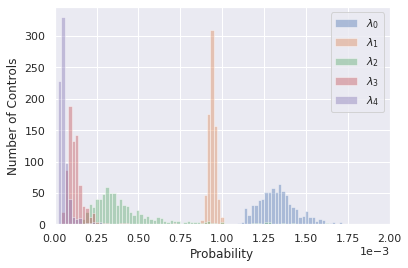

In [369]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
lim = .002
for ind,eta in enumerate(sample_values):
    ax = sns.distplot(data['sparsity'][eta]['weights'][1].T.tolist()[0], bins=np.linspace(0,lim,100), label=f"$\lambda_{ind}$", kde=False)
    #ax.xaxis.set_major_formatter(FormatStrFormatter('%.2F'))
    #ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
    ax.set_xlim(0,lim)
plt.legend()
plt.ylabel("Number of Controls")
plt.xlabel("Probability")
plt.savefig("sparisity-versus-parameter.png", dpi=500)

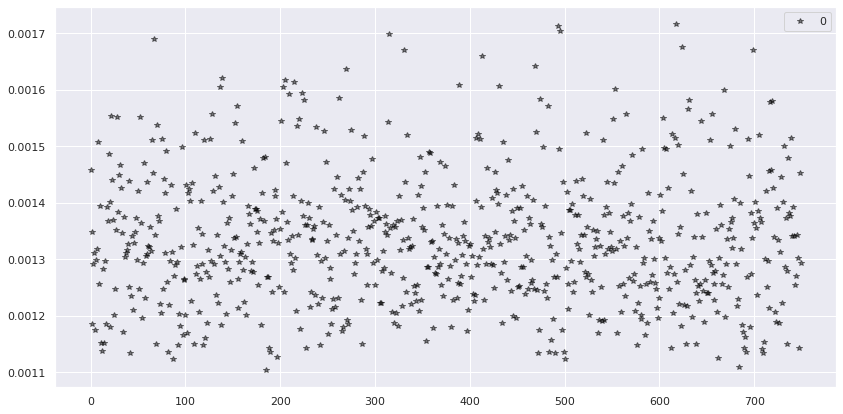

In [354]:
plt.figure(figsize=(14,7))
for ind,eta in enumerate([0]):
    plt.plot(np.arange(750), data['sparsity'][eta]['weights'][1].T.tolist()[0], 
             '*', color=f'#{ind}{ind}{ind}{ind}{2*ind}{2*ind}', alpha=.5, label=eta)
plt.legend()

In [325]:
for ind,eta in enumerate(sample_values):
    weights = np.array(data['agi'][eta]['weights'][0].T.tolist()[0])
    print(data['agi'][eta]['param'], list(zip(np.round(weights[weights>0.02],3), np.where(weights > 0.02)[0])))
    

0.005 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.0001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.01 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.1 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
1e-05 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
5e-07 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
1e-06 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.0001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]


In [326]:
for ind,eta in enumerate(sample_values):
    weights = np.array(data['sparsity'][eta]['weights'][0].T.tolist()[0])
    print(data['sparsity'][eta]['param'], list(zip(np.round(weights[weights>0.02],3), np.where(weights > 0.02)[0])))
    

0 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.001 [(0.065, 61), (0.485, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.0001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.005 [(0.065, 61), (0.485, 112), (0.107, 203), (0.251, 301), (0.092, 669)]
0.0005 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.00025 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.000125 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
6.25e-05 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
9.375e-05 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
7.8125e-05 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]


In [312]:
(.0000625* 2 + .0000625)/2

9.375e-05